# Drug Consumption Final Project

This notebook contains snippets of code relevent to our study. The data is imported and cleaned. Some exploratory data analysis is done as well. Following that, the final models for each method chosen are pasted. More details for each method can be found in the separate Jupyter notebooks in this directory. Finally, all the solutions are compared and a final best solution to the problem is chosen and explored. The acompanying paper for this research can be found in the same github repo [here](https://github.com/samantho/drug-prediction).

## Step 1: Import and Clean the Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

In [2]:
# Import Dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data', sep=",", names=['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'])
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
data['Age'] = np.where(data['Age'] == -0.95197, '18-24', np.where(data['Age'] == -0.07854, '25-34', np.where(data['Age'] == 0.49788, '35-44', np.where(data['Age'] == 1.09449, '45-54', np.where(data['Age'] == 1.82213, '55-64', np.where(data['Age'] == 2.59171, '65+', np.NAN))))))
data['Gender'] = np.where((data['Gender'] == 0.48246), 1, 0) # 1 is female, 0 male

edu = np.array([[-2.43591, 'Left school before 16 years'],
                [-1.73790, 'Left school at 16 years'],
                [-1.43719, 'Left school at 17 years'],
                [-1.22751, 'Left school at 18 years'],
                [-0.61113, 'Some college or university, no certificate or degree'],
                [-0.05921, 'Professional certificate/ diploma'],
                [0.45468, 'University degree'],
                [1.16365, 'Masters degree'],
                [1.98437, 'Doctorate degree']])
for i in range(edu.shape[0]):
    data['Education'] = np.where(data['Education'] == edu[i,0], edu[i,1], data['Education'])
data['Education'] = np.where(data['Education'] == edu[0,0], edu[0,1], data['Education'])

country = np.array([[-0.09765, 'Australia'],
                    [0.24923, 'Canada'],
                    [-0.46841, 'New Zealand'],
                    [-0.28519, 'Other'],
                    [0.21128, 'Republic of Ireland'],
                    [0.96082, 'UK'],
                    [-0.57009, 'USA']])
for i in range(country.shape[0]):
    data['Country'] = np.where(data['Country'] == country[i,0], country[i,1], data['Country'])
data['Country'] = np.where(data['Country'] == country[0,0], country[0,1], data['Country'])

ethnic = np.array([[-0.50212, 'Asian'],
                    [-1.10702, 'Black'],
                    [1.90725, 'Mixed-Black/Asian'],
                    [0.12600, 'Mixed-White/Asian'],
                    [-0.22166, 'Mixed-White/Black'],
                    [0.11440, 'Other'],
                    [-0.31685, 'White']])
for i in range(ethnic.shape[0]):
    data['Ethnicity'] = np.where(data['Ethnicity'] == ethnic[i,0], ethnic[i,1], data['Ethnicity'])
data['Ethnicity'] = np.where(data['Ethnicity'] == ethnic[0,0], ethnic[0,1], data['Ethnicity'])

nscore = np.array([[12, -3.46436], [29, -0.67825], [46, 1.02119],
                    [13, -3.15735], [30, -0.58016], [47, 1.13281],
                    [14, -2.75696], [31, -0.46725], [48, 1.23461],
                    [15, -2.52197], [32, -0.34799], [49, 1.37297],
                    [16, -2.42317], [33, -0.24649], [50, 1.49158],
                    [17, -2.34360], [34, -0.14882], [51, 1.60383],
                    [18, -2.21844], [35, -0.05188], [52, 1.72012],
                    [19, -2.05048], [36, 0.04257], [53, 1.83990],
                    [20, -1.86962], [37, 0.13606], [54, 1.98437],
                    [21, -1.69163], [38, 0.22393], [55, 2.12700],
                    [22, -1.55078], [39, 0.31287], [56, 2.28554],
                    [23, -1.43907], [40, 0.41667], [57, 2.46262],
                    [24, -1.32828], [41, 0.52135], [58, 2.61139],
                    [25, -1.19430], [42, 0.62967], [59, 2.82196],
                    [26, -1.05308], [43, 0.73545], [60, 3.27393],
                    [27, -0.92104], [44, 0.82562],
                    [28, -0.79151], [45, 0.91093]])
for i in range(nscore.shape[0]):
    data['Nscore'] = np.where(data['Nscore'] == float(nscore[i,1]), nscore[i,0], data['Nscore'])
data['Nscore'] = np.where(data['Nscore'] == float(nscore[0,1]), nscore[0,0], data['Nscore'])

escore = np.array([[16, -3.27393], [31, -1.23177], [45, 0.80523],
                    [18, -3.00537], [32, -1.09207], [46, 0.96248],
                    [19, -2.72827], [33, -0.94779], [47, 1.11406],
                    [20, -2.53830], [34, -0.80615], [48, 1.28610],
                    [21, -2.44904], [35, -0.69509], [49, 1.45421],
                    [22, -2.32338], [36, -0.57545], [50, 1.58487],
                    [23, -2.21069], [37, -0.43999], [51, 1.74091],
                    [24, -2.11437], [38, -0.30033], [52, 1.93886],
                    [25, -2.03972], [39, -0.15487], [53, 2.12700],
                    [26, -1.92173], [40, 0.00332], [54, 2.32338],
                    [27, -1.76250], [41, 0.16767], [55, 2.57309],
                    [28, -1.63340], [42, 0.32197], [56, 2.85950],
                    [29, -1.50796], [43, 0.47617], [58, 3.00537],
                    [30, -1.37639], [44, 0.63779], [59, 3.27393]])
for i in range(escore.shape[0]):
    data['Escore'] = np.where(data['Escore'] == float(escore[i,1]), escore[i,0], data['Escore'])
data['Escore'] = np.where(data['Escore'] == float(escore[0,1]), escore[0,0], data['Escore'])

oscore = np.array([[24, -3.27393], [38, -1.11902], [50, 0.58331],
                    [26, -2.85950], [39, -0.97631], [51, 0.72330],
                    [28, -2.63199], [40, -0.84732], [52, 0.88309],
                    [29, -2.39883], [41, -0.71727], [53, 1.06238],
                    [30, 2.21069], [42, -0.58331], [54, 1.24033],
                    [31, 2.09015], [43, -0.45174], [55, 1.43533],
                    [32, -1.97495], [44, -0.31776], [56, 1.65653],
                    [33, -1.82919], [45, -0.17779], [57, 1.88511],
                    [34, -1.68062], [46, -0.01928], [58, 2.15324],
                    [35, -1.55521], [47, 0.14143], [59, 2.44904],
                    [36, -1.42424], [48, 0.29338], [60, 2.90161],
                    [37, -1.27553], [49, 0.44585]])
for i in range(oscore.shape[0]):
    data['Oscore'] = np.where(data['Oscore'] == float(oscore[i,1]), oscore[i,0], data['Oscore'])
data['Oscore'] = np.where(data['Oscore'] == float(oscore[0,1]), oscore[0,0], data['Oscore'])

ascore = np.array([[12, -3.46436], [34, -1.34289], [48, 0.76096],
                    [16, -3.15735], [35, -1.21213], [49, 0.94156],
                    [18, -3.00537], [36, -1.07533], [50, 1.11406],
                    [23, -2.90161], [37, -0.91699], [51, 1.2861],
                    [24, -2.78793], [38, -0.76096], [52, 1.45039],
                    [25, -2.70172], [39, -0.60633], [53, 1.61108],
                    [26, -2.53830], [40, -0.45321], [54, 1.81866],
                    [27, -2.35413], [41, -0.30172], [55, 2.03972],
                    [28, -2.21844], [42, -0.15487], [56, 2.23427],
                    [29, -2.07848], [43, -0.01729], [57, 2.46262],
                    [30, -1.92595], [44, 0.13136], [58, 2.75696],
                    [31, -1.77200], [45, 0.28783], [59, 3.15735],
                    [32, -1.62090], [46, 0.43852], [60, 3.46436],
                    [33, -1.47955], [47, 0.59042]])
for i in range(ascore.shape[0]):
    data['Ascore'] = np.where(data['Ascore'] == float(ascore[i,1]), ascore[i,0], data['Ascore'])
data['Ascore'] = np.where(data['Ascore'] == float(ascore[0,1]), ascore[0,0], data['Ascore'])

cscore = np.array([[17, -3.46436], [32, -1.25773], [46, 0.58489],
                    [19, -3.15735], [33, -1.13788], [47, 0.7583],
                    [20, -2.90161], [34, -1.01450], [48, 0.93949],
                    [21, -2.72827], [35, -0.89891], [49, 1.13407],
                    [22, -2.57309], [36, -0.78155], [50, 1.30612],
                    [23, -2.42317], [37, -0.65253], [51, 1.46191],
                    [24, -2.30408], [38, -0.52745], [52, 1.63088],
                    [25, -2.18109], [39, -0.40581], [53, 1.81175],
                    [26, -2.04506], [40, -0.27607], [54, 2.04506],
                    [27, -1.92173], [41, -0.14277], [55, 2.33337],
                    [28, -1.78169], [42, -0.00665], [56, 2.63199],
                    [29, -1.64101], [43, 0.12331], [57, 3.00537],
                    [30, -1.51840], [44, 0.25953], [59, 3.46436],
                    [31, -1.38502], [45, 0.41594]])
for i in range(cscore.shape[0]):
    data['Cscore'] = np.where(data['Cscore'] == float(cscore[i,1]), cscore[i,0], data['Cscore'])
data['Cscore'] = np.where(data['Cscore'] == float(cscore[0,1]), cscore[0,0], data['Cscore'])

# impulsiveness, SS are already clean

data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,35-44,1,Professional certificate/ diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,42.0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,25-34,0,Doctorate degree,UK,White,29.0,52.0,55.0,48.0,41.0,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,35-44,0,Professional certificate/ diploma,UK,White,31.0,45.0,40.0,32.0,34.0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,18-24,1,Masters degree,UK,White,34.0,34.0,46.0,47.0,46.0,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,35-44,1,Doctorate degree,UK,White,43.0,28.0,43.0,41.0,50.0,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
data.drop(data[data['Semer'] != 'CL0'].index, inplace = True)
data = data.drop('Semer', 1)

C:\Users\saman\AppData\Local\Temp/ipykernel_29996/1090525999.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Semer', 1)


In [5]:
drug_labels = ['Alcohol','Amphet','Amyl','Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA']
for i in data.columns:
    print(data[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [6]:
for drug in drug_labels:
    print(data.groupby(drug).size())

Alcohol
CL0     33
CL1     34
CL2     68
CL3    197
CL4    284
CL5    758
CL6    503
dtype: int64
Amphet
CL0    973
CL1    230
CL2    241
CL3    196
CL4     75
CL5     61
CL6    101
dtype: int64
Amyl
CL0    1299
CL1     210
CL2     236
CL3      91
CL4      24
CL5      14
CL6       3
dtype: int64
Benzos
CL0    999
CL1    116
CL2    230
CL3    234
CL4    119
CL5     84
CL6     95
dtype: int64
Caff
CL0      27
CL1      10
CL2      24
CL3      59
CL4     106
CL5     271
CL6    1380
dtype: int64
Choc
CL0     32
CL1      2
CL2     10
CL3     53
CL4    295
CL5    680
CL6    805
dtype: int64
Coke
CL0    1036
CL1     160
CL2     267
CL3     257
CL4      98
CL5      40
CL6      19
dtype: int64
Crack
CL0    1622
CL1      67
CL2     109
CL3      59
CL4       9
CL5       9
CL6       2
dtype: int64
Ecstasy
CL0    1020
CL1     112
CL2     232
CL3     275
CL4     154
CL5      63
CL6      21
dtype: int64
Heroin
CL0    1600
CL1      68
CL2      91
CL3      65
CL4      24
CL5      16
CL6      13
dtype: i

In [7]:
for drug in drug_labels:
    data[drug] = np.where(data[drug] == 'CL0', 0, 1)
    # not a user = 0, user = 1
data[drug_labels]

,Alcohol,Amphet,Amyl,Benzos,Caff,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,1,1,0,1,1,1,0,1,0,1,0,1,1,0,1,0
3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0
5,1,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1
1885,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,0
1886,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0
1887,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,1,0


In [8]:
drugs = pd.DataFrame()
for drug in drug_labels:
    drugs[drug] = data.groupby(drug).size()
drugs.index.name = 'Drug User'
drugs

,Alcohol,Amphet,Amyl,Benzos,Caff,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
Drug User,,,,,,,,,,,,,,,,,
0,33,973,1299,999,27,32,1036,1622,1020,1600,1488,1092,1069,1424,982,428,1452
1,1844,904,578,878,1850,1845,841,255,857,277,389,785,808,453,895,1449,425


In [9]:
data['Sch1'] = np.where((data['Heroin'] == 1) | (data['LSD'] == 1) | (data['Ecstasy'] == 1) | (data['Mushrooms'] == 1), 1, 0)
data['Sch2'] = np.where((data['Amphet'] == 1) | (data['Coke'] == 1) | (data['Crack'] == 1) | (data['Meth'] == 1), 1, 0)
data['Sch3'] = np.where((data['Ketamine'] == 1), 1, 0)
data['Sch4'] = np.where((data['Benzos'] == 1), 1, 0)
data['SchNA'] = np.where((data['Alcohol'] == 1) | (data['Amyl'] == 1) | (data['Caff'] == 1) | (data['Choc'] == 1) | (data['Legalh'] == 1) | (data['Nicotine'] == 1) | (data['VSA'] == 1), 1, 0)

In [10]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,LSD,Meth,Mushrooms,Nicotine,VSA,Sch1,Sch2,Sch3,Sch4,SchNA
1,35-44,1,Professional certificate/ diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,42.0,...,0,0,0,1,0,0,1,0,1,1
2,25-34,0,Doctorate degree,UK,White,29.0,52.0,55.0,48.0,41.0,...,1,1,0,1,0,1,1,1,0,1
3,35-44,0,Professional certificate/ diploma,UK,White,31.0,45.0,40.0,32.0,34.0,...,0,0,1,0,0,1,0,0,0,1
4,18-24,1,Masters degree,UK,White,34.0,34.0,46.0,47.0,46.0,...,0,0,0,1,0,0,1,1,1,1
5,35-44,1,Doctorate degree,UK,White,43.0,28.0,43.0,41.0,50.0,...,0,0,1,1,0,1,1,0,0,1


In [11]:
data.shape

(1877, 35)

In [13]:
#data.to_csv("drugs.csv", index=False)

In [15]:
drug_labels = ['Alcohol','Amphet','Amyl','Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA']
sched_1 = ['Heroin','LSD','Ecstasy','Mushrooms']
sched_2 = ['Amphet','Coke','Crack','Meth']
sched_3 = ['Ketamine']
sched_4 = ['Benzos']
not_controlled_substance = ['Alcohol','Amyl','Caff','Choc','Legalh','Nicotine','VSA']
schedules = ['Sch1','Sch2','Sch3','Sch4', 'SchNA']
personality_labels = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
demographic_labels = ['Age','Gender','Education','Country','Ethnicity']
target_label = ['Cannabis']

## Step 2: Models

### Logistic Classification

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict(X_test)
clf.predict_proba(X_test)

print(clf.score(X_test, y_test))

0.898936170212766


### Support Vector Machine

In [95]:
drugsC = pd.read_csv('SVMdrugs.csv')
y = drugsC['Cannabis']
X = drugsC.drop(target_label, 1)
y = np.where((y == 'CL0'), 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

[[ 32  15]
 [  5 136]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        47
           1       0.90      0.96      0.93       141

    accuracy                           0.89       188
   macro avg       0.88      0.82      0.85       188
weighted avg       0.89      0.89      0.89       188

Accuracy: 0.8936170212765957
Precision: 0.9006622516556292
Recall: 0.9645390070921985


### Random Forest

In [188]:
model = RandomForestClassifier(
            warm_start=True,
            max_features="sqrt",
            criterion='gini',
            max_depth=None,
            n_estimators=250,
            min_samples_split=2,
            oob_score=True
        )
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]
print("Accuracy:", model.score(X_test, y_test))
print(confusion_matrix(y_test, rf_predictions))

roc_value = roc_auc_score(y_test, rf_probs)
print("AUC", roc_value)

Accuracy: 0.9148936170212766
[[ 69  17]
 [ 15 275]]
AUC 0.9547714514835605


### Neural Network

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = MLPClassifier(solver='sgd', activation='relu',
                    hidden_layer_sizes=(12,), random_state=1, max_iter = 500)
clf.fit(X_train, y_train)
probs = clf.predict_log_proba(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test.argmax(axis=1), probs.argmax(axis=1)))
print("\nAccuracy: ", correct/probs.shape[0])

Confusion Matrix: 
 [[ 51  27]
 [ 12 286]]

Accuracy:  0.8962765957446809


## Step 3: Chosen Solution and Results

In [188]:
model = RandomForestClassifier(
            warm_start=True,
            max_features="sqrt",
            criterion='gini',
            max_depth=None,
            n_estimators=250,
            min_samples_split=2,
            oob_score=True
        )
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]
print("Accuracy:", model.score(X_test, y_test))
print(confusion_matrix(y_test, rf_predictions))

roc_value = roc_auc_score(y_test, rf_probs)
print("AUC", roc_value)

Accuracy: 0.9148936170212766
[[ 69  17]
 [ 15 275]]
AUC 0.9547714514835605


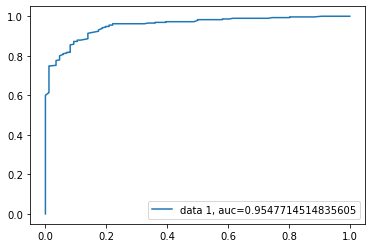

In [189]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<BarContainer object of 17 artists>

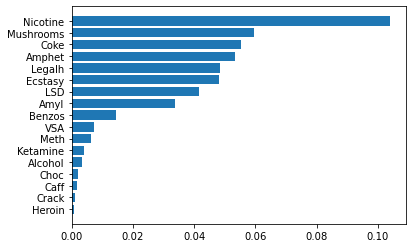

In [210]:
plt.barh(feature_importances.loc[drug_labels].sort_values('Importance', ascending=True).index, feature_importances.loc[drug_labels].sort_values('Importance', ascending=True)['Importance'])